In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv',sep=',')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:,1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc= MinMaxScaler(feature_range=(0,1))

In [10]:
training_set_scaled=sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [12]:
X_train =[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [13]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [14]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [15]:
y_train.shape

(1198,)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [18]:
regressor = Sequential()

In [19]:
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 

In [21]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 

In [22]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2)) 

In [23]:
regressor.add(Dense(units = 1))

In [24]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [26]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0437
Epoch 2/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0066
Epoch 4/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0043
Epoch 13/100
38/38 [=====

In [27]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',sep=',')

In [40]:
real_stock_price =dataset_test.iloc[:,1:2].values

In [41]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [42]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60: ].values

In [43]:
inputs = inputs.reshape(-1,1)

In [44]:
inputs = sc.transform(inputs)

In [45]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [46]:
X_test = np.array(X_test)

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
predicted_stock_price = regressor.predict(X_test)

In [49]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

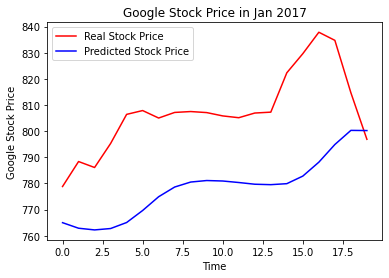

In [50]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title("Google Stock Price in Jan 2017")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [51]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [52]:
rmse

31.44278455048768